In [1]:
import numpy as np
import seaborn as sns 
import pandas as pd
from tqdm import tqdm
import cv2
from tensorflow.keras.applications import Xception
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
TRAIN_PATH = '../Steel Defect Detection Dataset'
TRAIN_IMAGES = '../Steel Defect Detection Dataset/train_images'
TEST_IMAGES = '../Steel Defect Detection Dataset/train_images'

In [3]:
df_train = pd.read_csv(TRAIN_PATH + '/train.csv')
df_submission = pd.read_csv(TRAIN_PATH + '/sample_submission.csv')

In [4]:
df_train.head()

ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg        1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0007a71bf.jpg        3  18661 28 18863 82 19091 110 19347 110 19603 11...
2  000a4bcdd.jpg        1  37607 3 37858 8 38108 14 38359 20 38610 25 388...
3  000f6bf48.jpg        4  131973 1 132228 4 132483 6 132738 8 132993 11 ...
4  0014fce06.jpg        3  229501 11 229741 33 229981 55 230221 77 230468...

In [5]:
df_train.shape

(7095, 3)

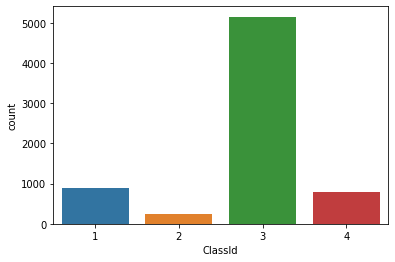

In [6]:
sns.countplot(x= df_train['ClassId'])
plt.show()

In [7]:
img = cv2.imread(TRAIN_IMAGES + '/0002cc93b.jpg')

In [8]:
img

array([[[ 70,  70,  70],
        [ 70,  70,  70],
        [ 68,  68,  68],
        ...,
        [ 48,  48,  48],
        [ 48,  48,  48],
        [ 50,  50,  50]],

       [[ 66,  66,  66],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 48,  48,  48],
        [ 49,  49,  49],
        [ 51,  51,  51]],

       [[ 61,  61,  61],
        [ 64,  64,  64],
        [ 65,  65,  65],
        ...,
        [ 49,  49,  49],
        [ 51,  51,  51],
        [ 54,  54,  54]],

       ...,

       [[155, 155, 155],
        [133, 133, 133],
        [131, 131, 131],
        ...,
        [ 51,  51,  51],
        [ 51,  51,  51],
        [ 50,  50,  50]],

       [[160, 160, 160],
        [111, 111, 111],
        [100, 100, 100],
        ...,
        [ 55,  55,  55],
        [ 54,  54,  54],
        [ 48,  48,  48]],

       [[155, 155, 155],
        [114, 114, 114],
        [ 98,  98,  98],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 50,  50,  50]]

In [9]:
df_train.head()

ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg        1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0007a71bf.jpg        3  18661 28 18863 82 19091 110 19347 110 19603 11...
2  000a4bcdd.jpg        1  37607 3 37858 8 38108 14 38359 20 38610 25 388...
3  000f6bf48.jpg        4  131973 1 132228 4 132483 6 132738 8 132993 11 ...
4  0014fce06.jpg        3  229501 11 229741 33 229981 55 230221 77 230468...

In [10]:
len(df_train)

7095

In [11]:
from imutils import paths

In [12]:
for random_image in paths.list_images(TRAIN_IMAGES + '{0002cc93b.jpg}'):
    print(random_image)
    plt.imshow(random_image)
    plt.show()

The class ID for this image is: 1


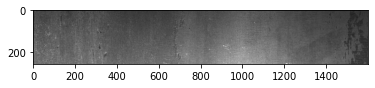

The class ID for this image is: 3


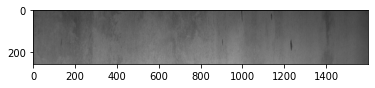

The class ID for this image is: 1


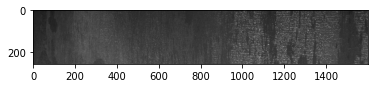

The class ID for this image is: 4


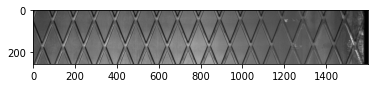

The class ID for this image is: 3


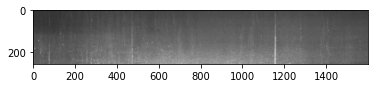

The class ID for this image is: 3


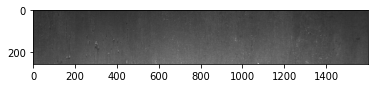

The class ID for this image is: 4


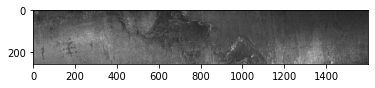

The class ID for this image is: 4


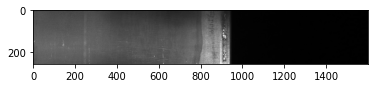

The class ID for this image is: 1


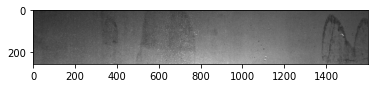

In [13]:
count = 0 
for image_path in paths.list_images(TRAIN_IMAGES):
    print("The class ID for this image is: {}".format(df_train['ClassId'].iloc[count]))
    count = count + 1
    random_image = plt.imread(image_path)
    plt.imshow(random_image)
    plt.show()
    if count == 9:
        break
        

In [14]:
images = []
classID = []
for image_id, class_id, encoded_bits in tqdm(df_train.values):
    img = cv2.imread(TRAIN_IMAGES + '/{}'.format(image_id), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img / 255
    images.append(img)
    classID.append(class_id)

100%|█████████████████████████████████████████████████████████████████████████████| 7095/7095 [00:47<00:00, 149.07it/s]


In [15]:
from sklearn.preprocessing import LabelBinarizer

In [16]:
images = np.array(images, dtype = np.float32)
classID = np.array(classID, dtype = np.float32)

In [17]:
lb = LabelBinarizer()
classID = lb.fit_transform(classID)

In [18]:
images[0]

array([[[0.25882354, 0.25882354, 0.25882354],
        [0.46666667, 0.46666667, 0.46666667],
        [0.23137255, 0.23137255, 0.23137255],
        ...,
        [0.18431373, 0.18431373, 0.18431373],
        [0.21568628, 0.21568628, 0.21568628],
        [0.2       , 0.2       , 0.2       ]],

       [[0.25882354, 0.25882354, 0.25882354],
        [0.30588236, 0.30588236, 0.30588236],
        [0.24705882, 0.24705882, 0.24705882],
        ...,
        [0.20392157, 0.20392157, 0.20392157],
        [0.22352941, 0.22352941, 0.22352941],
        [0.19215687, 0.19215687, 0.19215687]],

       [[0.24705882, 0.24705882, 0.24705882],
        [0.24313726, 0.24313726, 0.24313726],
        [0.23529412, 0.23529412, 0.23529412],
        ...,
        [0.20392157, 0.20392157, 0.20392157],
        [0.21960784, 0.21960784, 0.21960784],
        [0.19215687, 0.19215687, 0.19215687]],

       ...,

       [[0.49411765, 0.49411765, 0.49411765],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        [0.44313726, 0

In [19]:
classID[0]

array([1, 0, 0, 0])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_cv, y_train, y_cv = train_test_split(images, classID, test_size = 0.2, 
                                                stratify = classID, random_state = 101)

In [22]:
len(X_train)

5676

In [23]:
len(X_cv)

1419

In [24]:
type(X_train)

numpy.ndarray

In [25]:
lb.classes_

array([1., 2., 3., 4.], dtype=float32)

In [26]:
from tensorflow.keras.applications import Xception, VGG19, ResNet152, InceptionV3
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras import Model 
from tensorflow.keras.optimizers import Adam

In [27]:
headmodel = VGG19(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (224, 224, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [28]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [29]:
final_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [31]:
MODEL_SAVE_PATH = "Models/"

In [32]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "VGG19_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [33]:
fitted_model = final_model.fit(X_train, y_train, epochs = 10, validation_data = (X_cv, y_cv),
                               callbacks = checkpoint, batch_size = 64)

Epoch 1/1000
89/89 [==============================] - 19s 210ms/step - loss: 0.8012 - accuracy: 0.7186 - val_loss: 0.6798 - val_accuracy: 0.7364
Epoch 2/1000
89/89 [==============================] - 17s 194ms/step - loss: 0.6816 - accuracy: 0.7366 - val_loss: 0.6348 - val_accuracy: 0.7604
Epoch 3/1000
89/89 [==============================] - 17s 196ms/step - loss: 0.6457 - accuracy: 0.7500 - val_loss: 0.5888 - val_accuracy: 0.7555
Epoch 4/1000
89/89 [==============================] - 18s 197ms/step - loss: 0.6191 - accuracy: 0.7525 - val_loss: 0.5662 - val_accuracy: 0.7618
Epoch 5/1000
89/89 [==============================] - 18s 198ms/step - loss: 0.5892 - accuracy: 0.7599 - val_loss: 0.5517 - val_accuracy: 0.7879
Epoch 6/1000
89/89 [==============================] - 18s 199ms/step - loss: 0.5798 - accuracy: 0.7644 - val_loss: 0.5407 - val_accuracy: 0.7717
Epoch 7/1000
89/89 [==============================] - 18s 200ms/step - loss: 0.5564 - accuracy: 0.7703 - val_loss: 0.5340 - val_ac

89/89 [==============================] - 22s 250ms/step - loss: 0.3295 - accuracy: 0.8573 - val_loss: 0.4688 - val_accuracy: 0.8104
Epoch 114/1000
89/89 [==============================] - 22s 249ms/step - loss: 0.3391 - accuracy: 0.8501 - val_loss: 0.4651 - val_accuracy: 0.8132
Epoch 115/1000
89/89 [==============================] - 22s 249ms/step - loss: 0.3373 - accuracy: 0.8585 - val_loss: 0.4763 - val_accuracy: 0.8076
Epoch 116/1000
89/89 [==============================] - 22s 252ms/step - loss: 0.3266 - accuracy: 0.8584 - val_loss: 0.5182 - val_accuracy: 0.7822
Epoch 117/1000
89/89 [==============================] - 22s 250ms/step - loss: 0.3371 - accuracy: 0.8596 - val_loss: 0.4815 - val_accuracy: 0.8111
Epoch 118/1000
89/89 [==============================] - 22s 251ms/step - loss: 0.3307 - accuracy: 0.8603 - val_loss: 0.4772 - val_accuracy: 0.8041
Epoch 119/1000
89/89 [==============================] - 22s 250ms/step - loss: 0.3310 - accuracy: 0.8585 - val_loss: 0.4969 - val_acc

89/89 [==============================] - 22s 246ms/step - loss: 0.2734 - accuracy: 0.8811 - val_loss: 0.5523 - val_accuracy: 0.8090
Epoch 224/1000
89/89 [==============================] - 22s 248ms/step - loss: 0.2693 - accuracy: 0.8818 - val_loss: 0.5314 - val_accuracy: 0.7977
Epoch 225/1000
89/89 [==============================] - 22s 247ms/step - loss: 0.2707 - accuracy: 0.8816 - val_loss: 0.5464 - val_accuracy: 0.8027
Epoch 226/1000
89/89 [==============================] - 22s 248ms/step - loss: 0.2682 - accuracy: 0.8830 - val_loss: 0.5253 - val_accuracy: 0.7977
Epoch 227/1000
89/89 [==============================] - 22s 246ms/step - loss: 0.2675 - accuracy: 0.8788 - val_loss: 0.5342 - val_accuracy: 0.8055
Epoch 228/1000
89/89 [==============================] - 22s 247ms/step - loss: 0.2652 - accuracy: 0.8872 - val_loss: 0.5545 - val_accuracy: 0.7999
Epoch 229/1000
89/89 [==============================] - 22s 247ms/step - loss: 0.2566 - accuracy: 0.8841 - val_loss: 0.5443 - val_acc

Epoch 334/1000
89/89 [==============================] - 23s 257ms/step - loss: 0.2316 - accuracy: 0.8968 - val_loss: 0.5945 - val_accuracy: 0.8069
Epoch 335/1000
89/89 [==============================] - 23s 254ms/step - loss: 0.2401 - accuracy: 0.8904 - val_loss: 0.6070 - val_accuracy: 0.7984
Epoch 336/1000
89/89 [==============================] - 23s 253ms/step - loss: 0.2255 - accuracy: 0.8964 - val_loss: 0.6134 - val_accuracy: 0.7963
Epoch 337/1000
89/89 [==============================] - 23s 253ms/step - loss: 0.2328 - accuracy: 0.8939 - val_loss: 0.5969 - val_accuracy: 0.8140
Epoch 338/1000
89/89 [==============================] - 23s 254ms/step - loss: 0.2254 - accuracy: 0.9003 - val_loss: 0.6130 - val_accuracy: 0.8013
Epoch 339/1000
89/89 [==============================] - 23s 254ms/step - loss: 0.2244 - accuracy: 0.9001 - val_loss: 0.6030 - val_accuracy: 0.8006
Epoch 340/1000
89/89 [==============================] - 23s 253ms/step - loss: 0.2243 - accuracy: 0.8969 - val_loss: 0

Epoch 445/1000
89/89 [==============================] - 22s 249ms/step - loss: 0.2099 - accuracy: 0.9045 - val_loss: 0.6591 - val_accuracy: 0.7956
Epoch 446/1000
89/89 [==============================] - 22s 248ms/step - loss: 0.2036 - accuracy: 0.9089 - val_loss: 0.7052 - val_accuracy: 0.7956
Epoch 447/1000
89/89 [==============================] - 22s 247ms/step - loss: 0.1942 - accuracy: 0.9131 - val_loss: 0.7290 - val_accuracy: 0.8034
Epoch 448/1000
89/89 [==============================] - 22s 248ms/step - loss: 0.2039 - accuracy: 0.9066 - val_loss: 0.6761 - val_accuracy: 0.7956
Epoch 449/1000
89/89 [==============================] - 22s 248ms/step - loss: 0.2025 - accuracy: 0.9068 - val_loss: 0.6985 - val_accuracy: 0.8062
Epoch 450/1000
89/89 [==============================] - 22s 248ms/step - loss: 0.2066 - accuracy: 0.9061 - val_loss: 0.6702 - val_accuracy: 0.8020
Epoch 451/1000
89/89 [==============================] - 22s 249ms/step - loss: 0.2016 - accuracy: 0.9086 - val_loss: 0

Epoch 501/1000
89/89 [==============================] - 22s 251ms/step - loss: 0.2016 - accuracy: 0.9047 - val_loss: 0.6475 - val_accuracy: 0.7992
Epoch 502/1000
89/89 [==============================] - 23s 253ms/step - loss: 0.1954 - accuracy: 0.9098 - val_loss: 0.7261 - val_accuracy: 0.7949
Epoch 503/1000
89/89 [==============================] - 22s 251ms/step - loss: 0.1969 - accuracy: 0.9126 - val_loss: 0.7151 - val_accuracy: 0.7942
Epoch 504/1000
89/89 [==============================] - 22s 251ms/step - loss: 0.2006 - accuracy: 0.9050 - val_loss: 0.6950 - val_accuracy: 0.8048
Epoch 505/1000
89/89 [==============================] - 22s 251ms/step - loss: 0.1946 - accuracy: 0.9110 - val_loss: 0.6895 - val_accuracy: 0.7963
Epoch 506/1000
89/89 [==============================] - 22s 252ms/step - loss: 0.1940 - accuracy: 0.9093 - val_loss: 0.7056 - val_accuracy: 0.8062
Epoch 507/1000
89/89 [==============================] - 23s 253ms/step - loss: 0.1938 - accuracy: 0.9100 - val_loss: 0

89/89 [==============================] - 22s 251ms/step - loss: 0.1841 - accuracy: 0.9124 - val_loss: 0.7239 - val_accuracy: 0.7956
Epoch 612/1000
89/89 [==============================] - 22s 251ms/step - loss: 0.1708 - accuracy: 0.9198 - val_loss: 0.7612 - val_accuracy: 0.7921
Epoch 613/1000
89/89 [==============================] - 22s 251ms/step - loss: 0.1856 - accuracy: 0.9158 - val_loss: 0.7144 - val_accuracy: 0.7907
Epoch 614/1000
89/89 [==============================] - 22s 253ms/step - loss: 0.1770 - accuracy: 0.9165 - val_loss: 0.7077 - val_accuracy: 0.8020
Epoch 615/1000
89/89 [==============================] - 22s 251ms/step - loss: 0.1814 - accuracy: 0.9168 - val_loss: 0.7189 - val_accuracy: 0.8062
Epoch 616/1000
89/89 [==============================] - 22s 250ms/step - loss: 0.1907 - accuracy: 0.9153 - val_loss: 0.6893 - val_accuracy: 0.7956
Epoch 617/1000
89/89 [==============================] - 23s 253ms/step - loss: 0.1818 - accuracy: 0.9153 - val_loss: 0.7197 - val_acc

89/89 [==============================] - 22s 252ms/step - loss: 0.1737 - accuracy: 0.9195 - val_loss: 0.7832 - val_accuracy: 0.7900
Epoch 722/1000
89/89 [==============================] - 22s 247ms/step - loss: 0.1757 - accuracy: 0.9193 - val_loss: 0.7893 - val_accuracy: 0.7977
Epoch 723/1000
89/89 [==============================] - 22s 248ms/step - loss: 0.1833 - accuracy: 0.9170 - val_loss: 0.7452 - val_accuracy: 0.7963
Epoch 724/1000
89/89 [==============================] - 22s 247ms/step - loss: 0.1725 - accuracy: 0.9130 - val_loss: 0.7668 - val_accuracy: 0.7921
Epoch 725/1000
89/89 [==============================] - 22s 248ms/step - loss: 0.1765 - accuracy: 0.9205 - val_loss: 0.7908 - val_accuracy: 0.7999
Epoch 726/1000
89/89 [==============================] - 22s 248ms/step - loss: 0.1666 - accuracy: 0.9216 - val_loss: 0.8059 - val_accuracy: 0.7949
Epoch 727/1000
89/89 [==============================] - 22s 245ms/step - loss: 0.1757 - accuracy: 0.9212 - val_loss: 0.7611 - val_acc

Epoch 777/1000
89/89 [==============================] - 22s 249ms/step - loss: 0.1724 - accuracy: 0.9214 - val_loss: 0.7729 - val_accuracy: 0.7942
Epoch 778/1000
89/89 [==============================] - 22s 252ms/step - loss: 0.1782 - accuracy: 0.9163 - val_loss: 0.7932 - val_accuracy: 0.7893
Epoch 779/1000
89/89 [==============================] - 22s 251ms/step - loss: 0.1741 - accuracy: 0.9200 - val_loss: 0.8288 - val_accuracy: 0.7970
Epoch 780/1000
89/89 [==============================] - 22s 249ms/step - loss: 0.1783 - accuracy: 0.9151 - val_loss: 0.8143 - val_accuracy: 0.7963
Epoch 781/1000
89/89 [==============================] - 22s 249ms/step - loss: 0.1719 - accuracy: 0.9186 - val_loss: 0.7879 - val_accuracy: 0.7914
Epoch 782/1000
89/89 [==============================] - 22s 251ms/step - loss: 0.1711 - accuracy: 0.9207 - val_loss: 0.7646 - val_accuracy: 0.7907
Epoch 783/1000
89/89 [==============================] - 22s 249ms/step - loss: 0.1724 - accuracy: 0.9197 - val_loss: 0

89/89 [==============================] - 22s 244ms/step - loss: 0.1680 - accuracy: 0.9232 - val_loss: 0.8019 - val_accuracy: 0.7928
Epoch 888/1000
89/89 [==============================] - 22s 244ms/step - loss: 0.1651 - accuracy: 0.9211 - val_loss: 0.8446 - val_accuracy: 0.7935
Epoch 889/1000
89/89 [==============================] - 22s 243ms/step - loss: 0.1655 - accuracy: 0.9220 - val_loss: 0.8365 - val_accuracy: 0.8006
Epoch 890/1000
89/89 [==============================] - 22s 245ms/step - loss: 0.1628 - accuracy: 0.9241 - val_loss: 0.8538 - val_accuracy: 0.7935
Epoch 891/1000
89/89 [==============================] - 22s 243ms/step - loss: 0.1651 - accuracy: 0.9232 - val_loss: 0.8310 - val_accuracy: 0.8013
Epoch 892/1000
89/89 [==============================] - 22s 245ms/step - loss: 0.1710 - accuracy: 0.9172 - val_loss: 0.8206 - val_accuracy: 0.7893
Epoch 893/1000
89/89 [==============================] - 22s 244ms/step - loss: 0.1685 - accuracy: 0.9168 - val_loss: 0.8546 - val_acc

89/89 [==============================] - 22s 246ms/step - loss: 0.1580 - accuracy: 0.9246 - val_loss: 0.8524 - val_accuracy: 0.7977
Epoch 998/1000
89/89 [==============================] - 22s 246ms/step - loss: 0.1525 - accuracy: 0.9295 - val_loss: 0.8995 - val_accuracy: 0.8006
Epoch 999/1000
89/89 [==============================] - 22s 245ms/step - loss: 0.1618 - accuracy: 0.9225 - val_loss: 0.8835 - val_accuracy: 0.7949
Epoch 1000/1000
89/89 [==============================] - 22s 245ms/step - loss: 0.1586 - accuracy: 0.9220 - val_loss: 0.8451 - val_accuracy: 0.7956


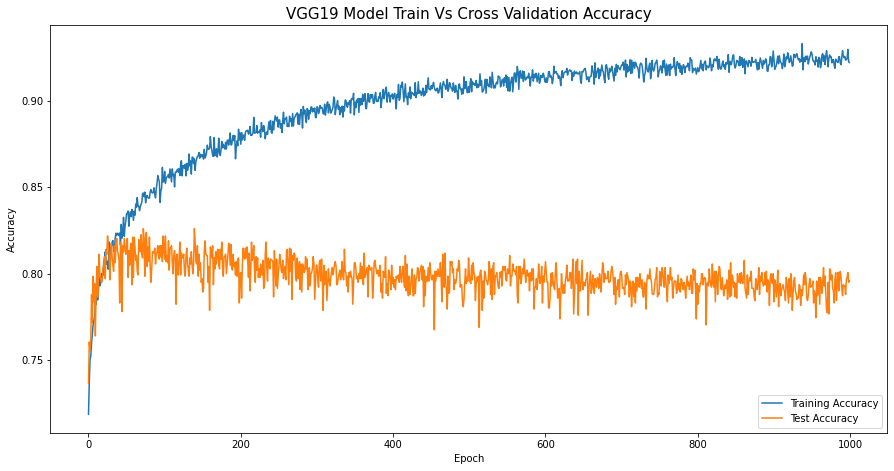

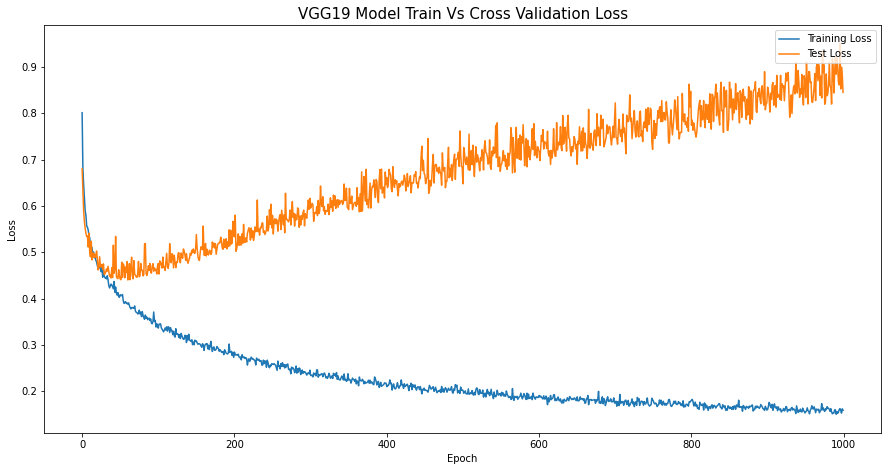

In [35]:
N = 1000
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('VGG19 Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/VGG19_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('VGG19 Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/VGG19_Loss_plot.jpg")
plt.show()


In [ ]:
## AveragePooling2D layer size (4, 4) and dropout rate 0.1 
headmodel = VGG19(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (224, 224, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (4, 4))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.1)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [ ]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [ ]:
final_model.summary()

In [ ]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "VGG19_weights_modified.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [ ]:
final_model.fit(X_train, y_train, epochs = 1000, validation_data = (X_cv, y_cv), 
                callbacks = checkpoint, batch_size = 64)

In [ ]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('VGG19 Modified Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/VGG19_modified_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('VGG19 Modifield Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/VGG19_modified_Loss_plot.jpg")
plt.show()


In [ ]:
images = []
classID = []
for image_id, class_id, encoded_bits in tqdm(df_train.values):
    img = cv2.imread(TRAIN_IMAGES + '/{}'.format(image_id), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))
    img = img / 255
    images.append(img)
    classID.append(class_id)

In [ ]:
images = np.array(images, dtype = np.float32)
classID = np.array(classID, dtype = np.float32)

In [ ]:
lb = LabelBinarizer()
classID = lb.fit_transform(classID)

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(images, classID, test_size = 0.2, 
                                                stratify = classID, random_state = 101)

In [ ]:
images.shape

In [ ]:
headmodel = Xception(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (299, 299, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [ ]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [ ]:
final_model.summary()

In [ ]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "Xception_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [ ]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               callbacks = checkpoint, epochs = 1000, batch_size = 64)

In [ ]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('Xception Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/Xception_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('Xception Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/Xception_Loss_plot.jpg")
plt.show()


In [ ]:
headmodel = InceptionV3(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (299, 299, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dense(256, activation = 'relu')(model)
model = Dropout(0.1)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [ ]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [ ]:
final_model.summary()

In [ ]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "InceptionV3_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [ ]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               epochs = 1000, batch_size = 64, callbacks = checkpoint)

In [ ]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('InceptionV3 Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/InceptionV3_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('InceptionV3 Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/InceptionV3_Loss_plot.jpg")
plt.show()
